In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import utils
from data_statistical_features import Segment, SegmentStatistical

import os

# Load Data

In [2]:
df = pd.read_csv(utils.get_own_features_csv_path(segment_length=10, overlap_amount=0.9, hr_threshold=10, data_folder='data_patients'), index_col=False)

In [3]:
mask_inf = df['informative']
mask_non_inf = ~df['informative']
arr = df['peak_frequency_acf'].copy()
#print(df.loc[mask_inf, 'peak_frequency_acf'].describe())
# print(df.loc[mask_non_inf, 'peak_frequency_acf'].describe())
# arr = (arr * 60)
arr.describe()

count    856925.000000
mean          2.226673
std           1.171454
min           0.400000
25%           0.900000
50%           2.600000
75%           3.100000
max           6.800000
Name: peak_frequency_acf, dtype: float64

In [4]:
df = pd.read_csv(utils.get_own_features_csv_path(segment_length=10, overlap_amount=0.9, hr_threshold=10, data_folder='data_patients'), index_col=False)

features = df.drop(Segment.get_feature_name_array(), axis='columns')
features['brueser_sqi'] = df['brueser_sqi']
features = features.fillna(0)
informative_inf = df[Segment.get_feature_name_array()]
target = df['informative']
patient_id = df['patient_id']
features_new = df.drop(SegmentStatistical.get_feature_name_array(), axis='columns')
features_new['brueser_sqi'] = df['brueser_sqi']
df_new = features_new.copy()
df_new['error'] = df['error']

# Correlation Heatmap

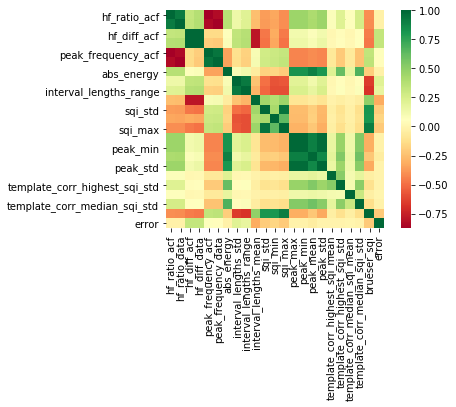

In [5]:
sns.heatmap(df_new.corr(), square=True, cmap ="RdYlGn")

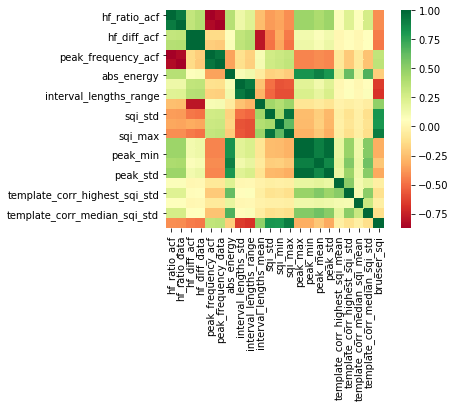

In [6]:
sns.heatmap(features_new.corr(), square=True, cmap ="RdYlGn")

# Paarweise geplottet

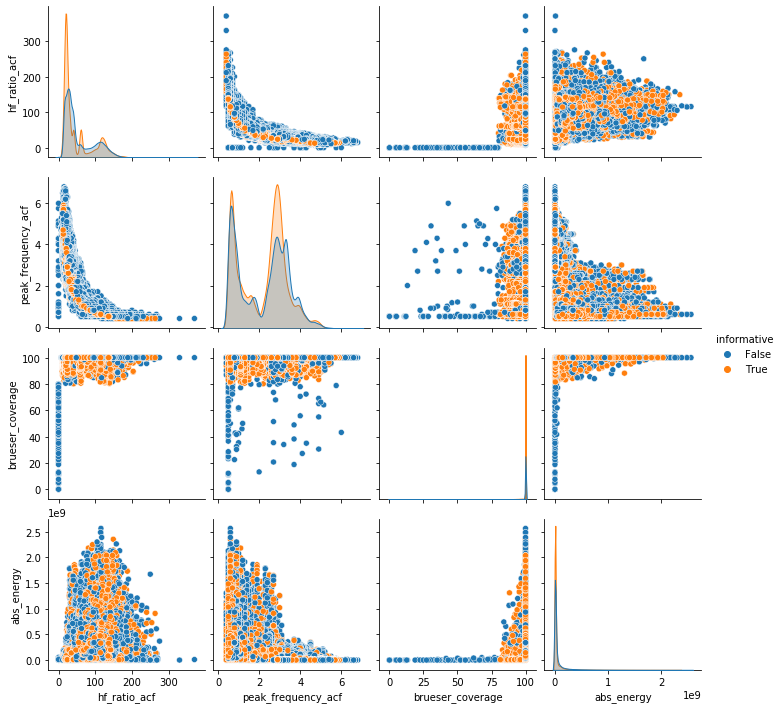

In [7]:
cols = ['hf_ratio_acf', 'peak_frequency_acf', 'brueser_coverage', 'abs_energy', 'informative']
sns.pairplot(df[cols], kind='scatter', hue='informative', dropna=True)


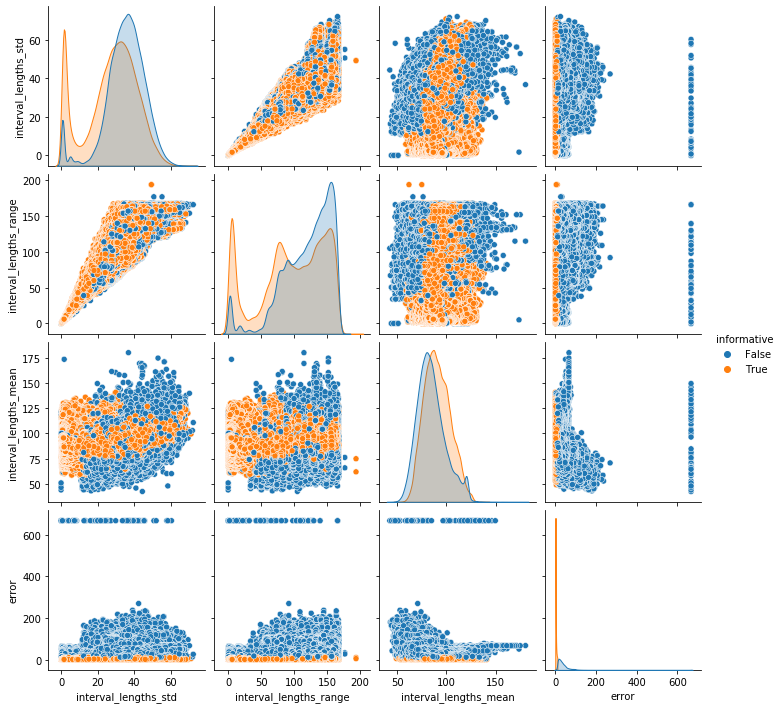

In [8]:
cols = ['interval_lengths_std', 'interval_lengths_range', 'interval_lengths_mean', 'error', 'informative']
sns.pairplot(df[cols], kind='scatter', hue='informative', dropna=True)


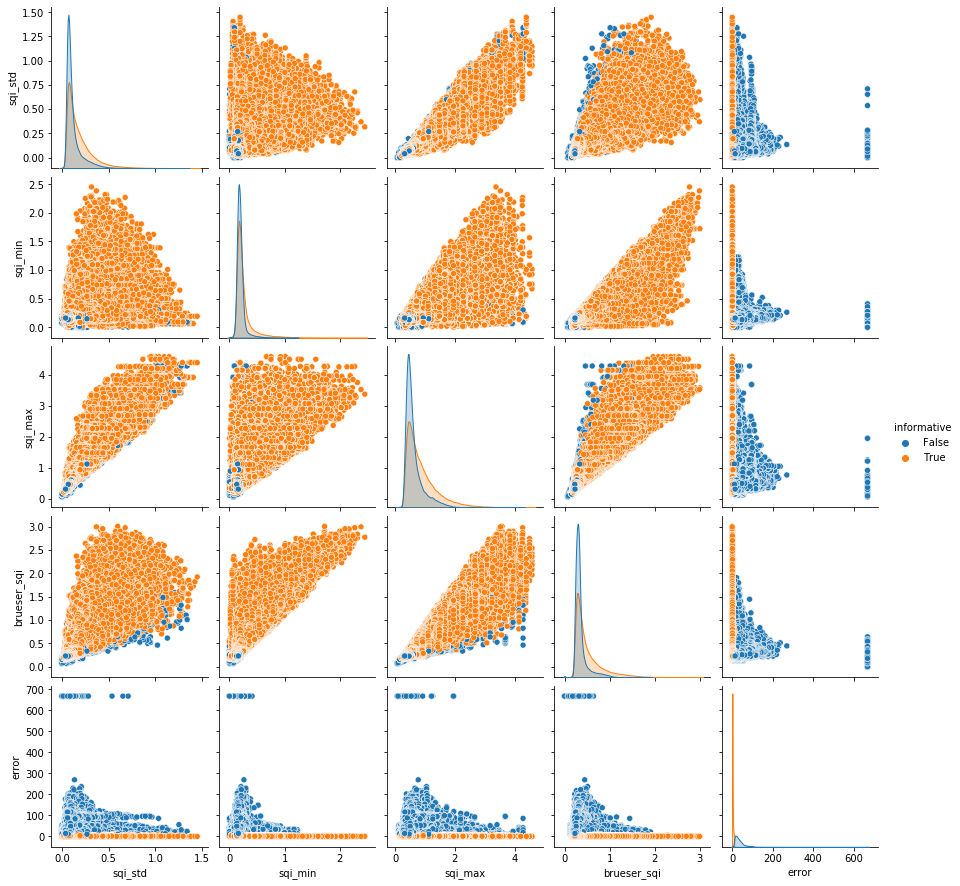

In [9]:
cols = ['sqi_std', 'sqi_min', 'sqi_max', 'brueser_sqi', 'error', 'informative']
sns.pairplot(df[cols], kind='scatter', hue='informative', dropna=True)

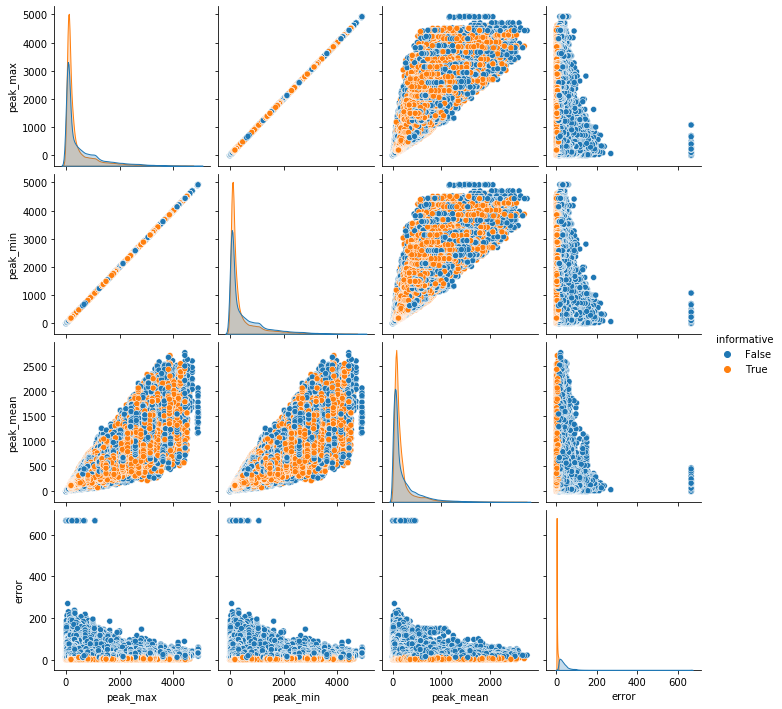

In [10]:
cols = ['peak_max','peak_min', 'peak_mean', 'error', 'informative']
sns.pairplot(df[cols], kind='scatter', hue='informative', dropna=True)

# Boxplots features

# Einfluss der Merkmale bei Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


from ml_statistical_features import get_patient_split

In [12]:
forest = RandomForestClassifier(random_state=1)
features = features.replace([np.inf, -np.inf], 0)


x_train, x_test, y_train, y_test, groups_train, groups_test = get_patient_split(features, target, patient_id, test_size=0.2)

In [13]:
forest.fit(x_train.fillna(0), y_train)

RandomForestClassifier(random_state=1)

In [14]:
print("Trainings-Set: ", str(forest.score(x_train, y_train)))
print("Test-Set: ", str(forest.score(x_test, y_test)))

Trainings-Set:  0.9999957756474525
Test-Set:  0.6446175830157866


 1) hf_diff_acf                    0.086117
 2) hf_diff_data                   0.074948
 3) brueser_sqi                    0.062058
 4) interval_lengths_std           0.044974
 5) hf_ratio_acf                   0.040762
 6) hf_ratio_data                  0.039162
 7) interval_lengths_mean          0.036431
 8) number_zero_crossings          0.033521
 9) sqi_max                        0.032355
10) sqi_std                        0.030166
11) mad                            0.029729
12) peak_frequency_data            0.029648
13) interval_lengths_range         0.029018
14) iqr                            0.028633
15) peak_frequency_acf             0.025618
16) skewness                       0.025601
17) sqi_min                        0.024189
18) peak_mean                      0.023868
19) mean_signal_envelope           0.022388
20) kurtosis                       0.022101
21) variance_local_maxima          0.020014
22) abs_energy                     0.019713
23) std                         

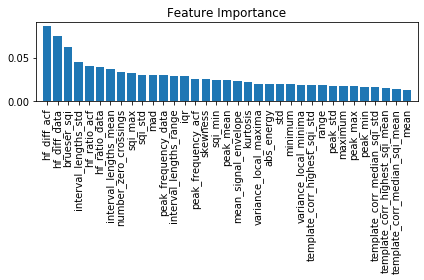

In [15]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, features.columns[indices[f]], importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train.shape[1]), features.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
plt.show()

In [16]:
forest_regr = RandomForestRegressor(random_state=1)

y_train_regr = informative_inf.loc[y_train.index]['error']
print(x_train.columns)
# y_train_regr[y_train_regr > 10000] = 667
forest_regr.fit(x_train.dropna(axis='index'), y_train_regr)
print("Trainings-Set: ", str(forest_regr.score(x_train, df.loc[y_train.index]['error'])))
print("Test-Set: ", str(forest_regr.score(x_test, df.loc[y_test.index]['error'])))

Index(['minimum', 'maximum', 'mean', 'std', 'range', 'iqr', 'mad',
       'number_zero_crossings', 'kurtosis', 'skewness',
       'variance_local_maxima', 'variance_local_minima',
       'mean_signal_envelope', 'hf_ratio_acf', 'hf_ratio_data', 'hf_diff_acf',
       'hf_diff_data', 'peak_frequency_acf', 'peak_frequency_data',
       'abs_energy', 'interval_lengths_std', 'interval_lengths_range',
       'interval_lengths_mean', 'sqi_std', 'sqi_min', 'sqi_max', 'peak_max',
       'peak_min', 'peak_mean', 'peak_std', 'template_corr_highest_sqi_mean',
       'template_corr_highest_sqi_std', 'template_corr_median_sqi_mean',
       'template_corr_median_sqi_std', 'brueser_sqi'],
      dtype='object')
Trainings-Set:  0.9822653712222587
Test-Set:  0.7078349164959322


667.0
MSE: 284.202061169605
MAE: 12.503953274256824
146960
30172
Coverage: 20.53075666848122
                 precision    recall  f1-score   support

non-informative       0.60      0.90      0.72     78751
    informative       0.73      0.32      0.45     68209

       accuracy                           0.63    146960
      macro avg       0.67      0.61      0.58    146960
   weighted avg       0.66      0.63      0.59    146960



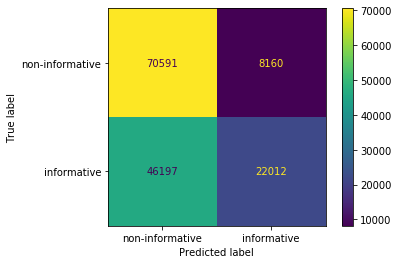

In [27]:
y_pred = forest_regr.predict(x_test)
y_true = df.loc[y_test.index]['error']

print(np.max(y_pred))

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error

print("MSE: " + str(mean_squared_error(y_true, y_pred)))
print("MAE: " + str(mean_absolute_error(y_true, y_pred)))

y_pred_label = np.array([err < 10 for err in y_pred])
y_true_label = np.array([err < 10 for err in y_true])
print(len(y_pred_label))
print(len(y_pred_label[y_pred_label]))

print("Coverage: " + str(100/len(y_pred_label) * len(y_pred_label[y_pred_label])))
class_names = ['non-informative', 'informative']
ConfusionMatrixDisplay(confusion_matrix(y_true_label, y_pred_label), display_labels=class_names).plot()
print(classification_report(y_true_label, y_pred_label, target_names=class_names))

 1) hf_diff_acf                    0.393807
 2) hf_diff_data                   0.120428
 3) hf_ratio_data                  0.097562
 4) hf_ratio_acf                   0.089261
 5) number_zero_crossings          0.034499
 6) brueser_sqi                    0.023726
 7) iqr                            0.021424
 8) skewness                       0.020548
 9) interval_lengths_std           0.016412
10) mad                            0.014415
11) interval_lengths_range         0.012530
12) kurtosis                       0.011499
13) sqi_std                        0.011094
14) sqi_max                        0.010739
15) sqi_min                        0.010286
16) interval_lengths_mean          0.010064
17) template_corr_highest_sqi_std  0.008361
18) peak_mean                      0.008044
19) variance_local_minima          0.007672
20) template_corr_highest_sqi_mean 0.007170
21) minimum                        0.007069
22) template_corr_median_sqi_std   0.006868
23) template_corr_median_sqi_mea

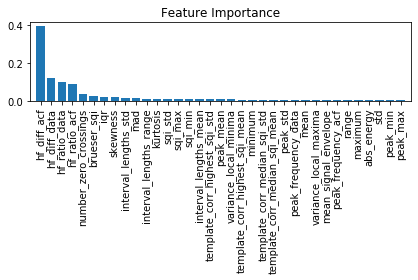

In [32]:
importances = forest_regr.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, features.columns[indices[f]], importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train.shape[1]), features.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
plt.show()

 1) hf_diff_acf                    141248.280405
 2) hf_diff_data                   134835.837964
 3) interval_lengths_mean          113127.875446
 4) brueser_sqi                    39808.164541
 5) sqi_max                        34168.964741
 6) sqi_std                        29957.658816
 7) interval_lengths_std           21574.352700
 8) sqi_min                        20826.510159
 9) interval_lengths_range         15035.371760
10) peak_frequency_acf             3885.036861
11) peak_frequency_data            3550.707182
12) peak_mean                      2222.464163
13) number_zero_crossings          2061.848193
14) iqr                            1534.425552
15) mad                            1516.112935
16) mean_signal_envelope           1485.618999
17) std                            1439.891434
18) kurtosis                       878.680389
19) minimum                        692.654603
20) range                          671.239469
21) peak_min                       645.400231
22) p

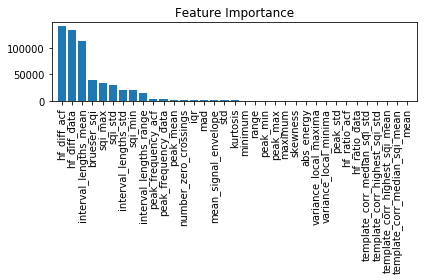

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(x_train, y_train_regr)
# transform train input data
X_train_fs = fs.transform(x_train)

importances = fs.scores_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, features.columns[indices[f]], importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train.shape[1]), features.columns[indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.tight_layout()
plt.show()

In [30]:
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler

In [31]:
std_scaler = StandardScaler()

x_std = std_scaler.fit_transform(x_test)

In [ ]:
pca = KernelPCA(n_components=2)
x_transform = pca.fit_transform(x_std)
df = pd.DataFrame(x_transform)
df['informative'] = y_test.values

sns.pairplot(df, kind='scatter', hue='informative')

In [ ]:
pca = KernelPCA(n_components=2, kernel='cosine')
x_transform = pca.fit_transform(x_std)
df = pd.DataFrame(x_transform)
df['informative'] = y_test.values

sns.pairplot(df, kind='scatter', hue='informative')

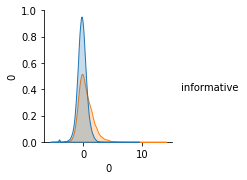

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(n_components=1)
clf.fit(x_std, y_test)
x_lda = clf.transform(x_std)
df_lda = pd.DataFrame(x_lda)
df_lda['informative'] = y_test.values

sns.pairplot(df_lda, kind='scatter', hue='informative')

                 precision    recall  f1-score   support

non-informative       0.55      0.91      0.69     78751
    informative       0.58      0.15      0.24     68209

       accuracy                           0.56    146960
      macro avg       0.57      0.53      0.46    146960
   weighted avg       0.57      0.56      0.48    146960



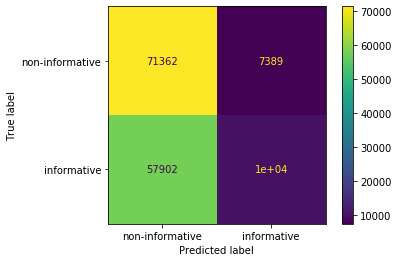

In [39]:
from sklearn.linear_model import ElasticNet

x_train_std = std_scaler.transform(x_train.dropna(axis='index'))
mtl = ElasticNet()
mtl.fit(x_train_std, y_train_regr)

y_pred = mtl.predict(x_std)

y_pred_label = np.array([err < 10 for err in y_pred])
y_true_label = np.array([err < 10 for err in y_true])

ConfusionMatrixDisplay(confusion_matrix(y_true_label, y_pred_label), display_labels=class_names).plot()
print(classification_report(y_true_label, y_pred_label, target_names=class_names))

In [ ]:
pca = KernelPCA(n_components=2, kernel='rbf')
x_transform = pca.fit_transform(x_std)

df = pd.DataFrame(x_transform)
df['informative'] = y_test.values

sns.pairplot(df, kind='scatter', hue='informative')

In [ ]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis

nca = NeighborhoodComponentsAnalysis(n_components=2)
x_nca = nca.fit_transform(x_std, y_test)

df_nca = pd.DataFrame(x_lda)
df_nca['informative'] = y_test.values

sns.pairplot(df_nca, kind='scatter', hue='informative')